In [8]:
%pip install matplotlib

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scheduler_cli-1.4.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/33/ee/e87d7a79a32f5ac833655ef29ebd37c7b389e8957bc71aacb10a95f822b9/matplotlib-3.8.0-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8b/4f/be28a39cd5e988b8d3c2cc642c2c7ffeeb28fe80a86df71b6d1e473c5038/contourpy-1.1.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/48/ae/43993b3561dca4cf2d18c24c53ce7e2fbba4e3a7d42950ca8f1aaa210590/fonttools-4.42.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.0/151.

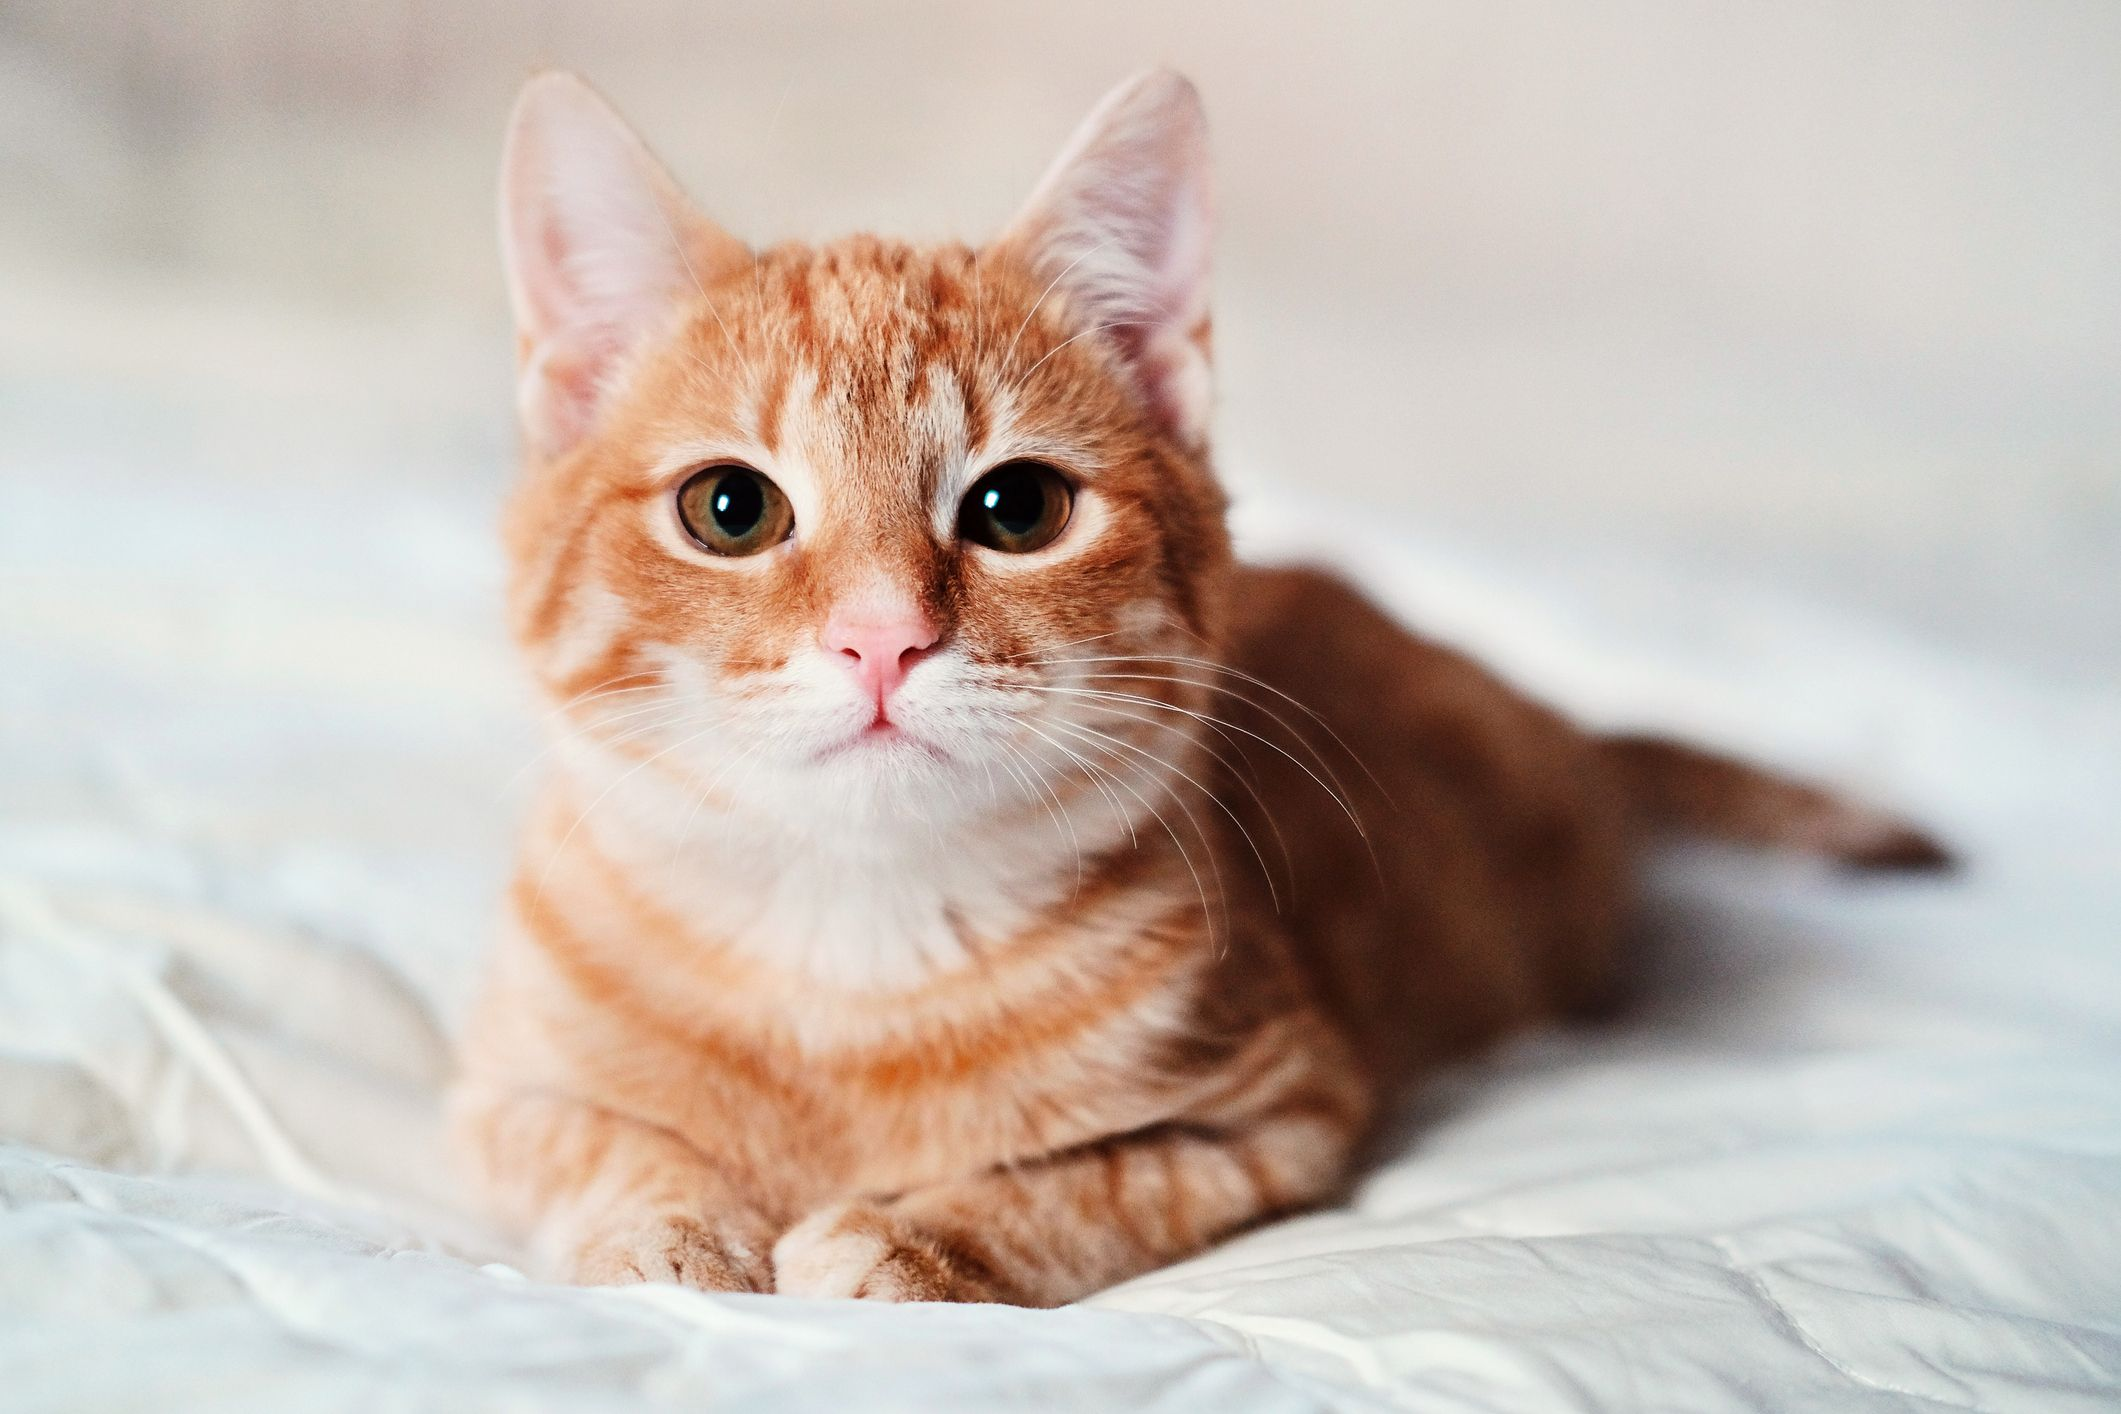

In [1]:
from PIL import Image
Image.open('cat.jpeg')

In [2]:
import boto3
client = boto3.client('rekognition')

In [4]:
with open('cat.jpeg', 'rb') as image:
    response = client.detect_labels(Image={'Bytes': image.read()})

In [5]:
response

{'Labels': [{'Name': 'Animal',
   'Confidence': 99.18551635742188,
   'Instances': [],
   'Parents': [],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Cat',
   'Confidence': 99.18551635742188,
   'Instances': [{'BoundingBox': {'Width': 0.7319527864456177,
      'Height': 0.8868390917778015,
      'Left': 0.18977190554141998,
      'Top': 0.044365618377923965},
     'Confidence': 94.50813293457031}],
   'Parents': [{'Name': 'Animal'}, {'Name': 'Mammal'}, {'Name': 'Pet'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Kitten',
   'Confidence': 99.18551635742188,
   'Instances': [],
   'Parents': [{'Name': 'Animal'},
    {'Name': 'Cat'},
    {'Name': 'Mammal'},
    {'Name': 'Pet'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Mammal',
   'Confidence': 99.18551635742188,
   'Instances': [],
   'Parents': [{'Name': 'Animal'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [15]:
# bbox_coords
bbox_coords = response['Labels'][1]['Instances'][0]['BoundingBox']

In [20]:
import numpy as np 
#Load the image using Pillow
image_pil = Image.open('cat.jpeg')

# Convert the image to a NumPy array
image_np = np.array(image_pil)

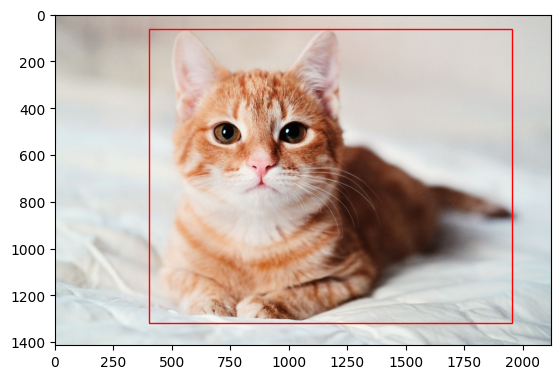

In [23]:
# Now you have a NumPy array representation of your image, which you can use with matplotlib
fig, axis = plt.subplots()
axis.imshow(image_np)  # Now pass the NumPy array instead of the bytes

# Assuming bbox_coords is already defined
width = bbox_coords['Width']*image_pil.width
height = bbox_coords['Height']*image_pil.height
left = bbox_coords['Left']*image_pil.width
top = bbox_coords['Top']*image_pil.height

rect = Rectangle((left, top), width, height, fill=False, color='red')
axis.add_patch(rect)
plt.show()

### Face detection

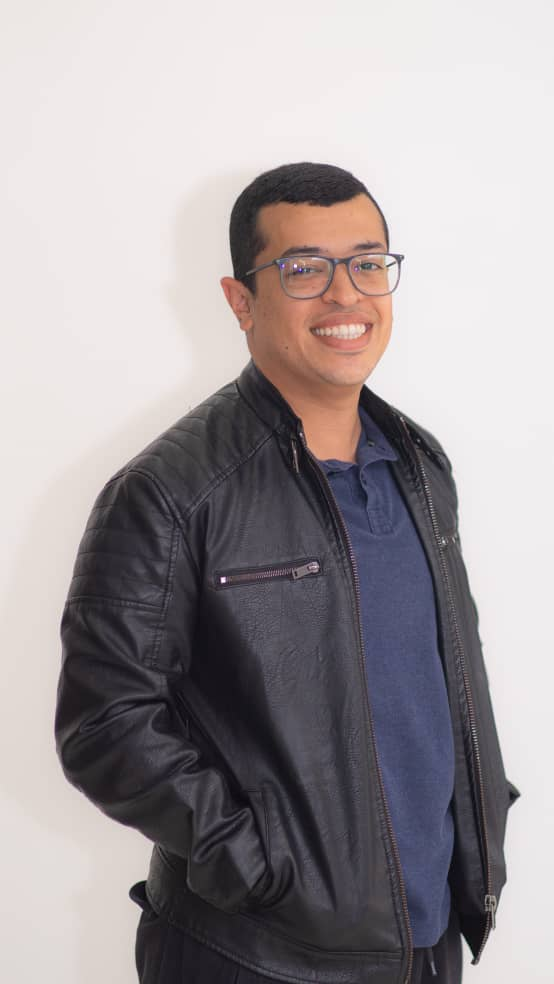

In [24]:
Image.open('perfil.jpeg')

In [25]:
with open('perfil.jpeg', 'rb') as image:
    response = client.detect_faces(Image={'Bytes': image.read()})

In [26]:
response

{'FaceDetails': [{'BoundingBox': {'Width': 0.25893163681030273,
    'Height': 0.18769735097885132,
    'Left': 0.4570431411266327,
    'Top': 0.19907845556735992},
   'Landmarks': [{'Type': 'eyeLeft',
     'X': 0.5509745478630066,
     'Y': 0.2734431028366089},
    {'Type': 'eyeRight', 'X': 0.6580775380134583, 'Y': 0.2683127522468567},
    {'Type': 'mouthLeft', 'X': 0.5705491304397583, 'Y': 0.33772191405296326},
    {'Type': 'mouthRight', 'X': 0.659764289855957, 'Y': 0.33318257331848145},
    {'Type': 'nose', 'X': 0.631483793258667, 'Y': 0.3001883029937744}],
   'Pose': {'Roll': -1.7785825729370117,
    'Yaw': 14.800248146057129,
    'Pitch': 9.179899215698242},
   'Quality': {'Brightness': 89.06954193115234,
    'Sharpness': 73.32209777832031},
   'Confidence': 99.99896240234375}],
 'ResponseMetadata': {'RequestId': 'fb127a1c-83be-471c-8a61-fa0a78fbc74a',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'fb127a1c-83be-471c-8a61-fa0a78fbc74a',
   'content-type': 'applicat

In [27]:
bbox_coords = response['FaceDetails'][0]['BoundingBox']

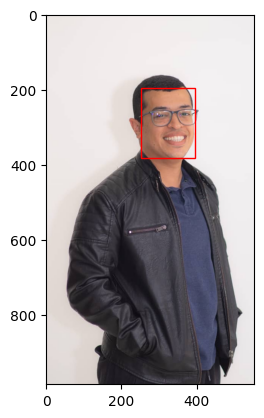

In [29]:
#Load the image using Pillow
image_pil = Image.open('perfil.jpeg')

# Convert the image to a NumPy array
image_np = np.array(image_pil)

# Now you have a NumPy array representation of your image, which you can use with matplotlib
fig, axis = plt.subplots()
axis.imshow(image_np)  # Now pass the NumPy array instead of the bytes

# Assuming bbox_coords is already defined
width = bbox_coords['Width']*image_pil.width
height = bbox_coords['Height']*image_pil.height
left = bbox_coords['Left']*image_pil.width
top = bbox_coords['Top']*image_pil.height

rect = Rectangle((left, top), width, height, fill=False, color='red')
axis.add_patch(rect)
plt.show()

### Text detection

In [30]:
with open('text.png', 'rb') as image:
    response = client.detect_text(Image={'Bytes': image.read()})

In [32]:
response

{'TextDetections': [{'DetectedText': 'Text Message',
   'Type': 'LINE',
   'Id': 0,
   'Confidence': 99.68689727783203,
   'Geometry': {'BoundingBox': {'Width': 0.1993449181318283,
     'Height': 0.05434563383460045,
     'Left': 0.3975476920604706,
     'Top': 0.028858579695224762},
    'Polygon': [{'X': 0.39778196811676025, 'Y': 0.028858579695224762},
     {'X': 0.5968925952911377, 'Y': 0.031749337911605835},
     {'X': 0.5966583490371704, 'Y': 0.08320420980453491},
     {'X': 0.3975476920604706, 'Y': 0.08031345903873444}]}},
  {'DetectedText': 'Today 15:46',
   'Type': 'LINE',
   'Id': 1,
   'Confidence': 99.20508575439453,
   'Geometry': {'BoundingBox': {'Width': 0.17444448173046112,
     'Height': 0.0535714291036129,
     'Left': 0.41111108660697937,
     'Top': 0.0892857164144516},
    'Polygon': [{'X': 0.41111108660697937, 'Y': 0.0892857164144516},
     {'X': 0.5855555534362793, 'Y': 0.0892857164144516},
     {'X': 0.5855555534362793, 'Y': 0.1428571492433548},
     {'X': 0.41111